In [1]:
import pandas as pd
import numpy as np
import tweepy 
from textblob import TextBlob
from wordcloud import WordCloud
from textblob.sentiments import NaiveBayesAnalyzer
import seaborn as sns
import re 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

### Read Twitter API

In [2]:
consumerKey = 'XX1'
consumerSecret = 'XX2'
accessToken = 'XX3'
accessTokenSecret = 'XX4'

### Authenticate API keys


In [3]:
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)
authenticate.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(authenticate, wait_on_rate_limit = True) # api object

### Get a Tweet from Twitter

In [4]:
post = api.user_timeline(screen_name="neiltyson", count = 100, tweet_mode="extended")

####  Print the last 5 tweets

In [5]:
i=1
for tweet in post[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

1) Leo from Virginia recommends Starry Messenger to fellow dogs concerned for the future of civilization. He also thinks you should pick up a copy for your pet human. #InternationalDogDay https://t.co/nvWhuMGU8S

2) SQUIRREL !!! https://t.co/CCb0gsn2gV

3) Leo from Virginia just read about how space exploration, giving access to unlimited resources, could bring an end to all wars on Earth waged over limited resources. Reflecting on this fact gives him hope of the future of humans. #InternationalDogDay https://t.co/AiNVJPMraR

4) In the chapter Meatarians &amp; Vegetarians, Leo from Virginia was intrigued that some humans eat only plants. #InternationalDogDay https://t.co/3QHp6qcEAQ

5) Reading his pre-release copy of Starry Messenger, Leo from Virginia was especially interested in the paragraph on Dog life-expectancy, in the final chapter titled “Life &amp; Death”. #InternationalDogDay https://t.co/fdpqn07S26



### Save Tweets in DataFrame

In [6]:
twitter = pd.DataFrame([tweet.full_text for tweet in post], columns=['Tweets'])

### Clean a Tweet

In [7]:
def cleanTxt(text):
    text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
    text = re.sub('#', '', text) # Removing '#' hash tag
    text = re.sub('RT[\s]+', '', text) # Removing RT
    text = re.sub('https?://\S+', '', text) # Removing hyperlink
    text = re.sub('&amp;', '&', text) # Replacing special characters with symbols
    text = re.sub('&lt;', '<', text)
    text = re.sub('&gt;', '>', text)
    text = re.sub('&quot;', '"', text)
    text = re.sub('&apos;', '`', text)
    return text

In [8]:
twitter['Tweets'] = twitter['Tweets'].apply(cleanTxt)

In [9]:
twitter.head()

,Tweets
0,Leo from Virginia recommends Starry Messenger ...
1,SQUIRREL !!!
2,Leo from Virginia just read about how space ex...
3,"In the chapter Meatarians & Vegetarians, Leo f..."
4,Reading his pre-release copy of Starry Messeng...


### Using Pattern Library

## Apply a Tweet to get subjectivity and polarity

In [10]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [11]:
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [12]:
twitter['Subjectivity'] = twitter['Tweets'].apply(getSubjectivity)
twitter['Polarity'] = twitter['Tweets'].apply(getPolarity)

In [13]:
twitter

,Tweets,Subjectivity,Polarity
0,Leo from Virginia recommends Starry Messenger ...,0.112500,0.000000
1,SQUIRREL !!!,0.000000,0.000000
2,Leo from Virginia just read about how space ex...,0.133929,-0.035714
3,"In the chapter Meatarians & Vegetarians, Leo f...",1.000000,0.000000
4,Reading his pre-release copy of Starry Messeng...,1.000000,0.250000
...,...,...,...
95,If it was not otherwise clear: The link to th...,0.383333,0.100000
96,everybody knows… \n\n1 Guffaw = 10 Chortles,0.000000,0.000000
97,We talked about science in bad movies. Was a g...,0.681905,-0.007143
98,"With a telescope, the Moon is best viewed duri...",0.581250,0.306250


### find a common word of tweets and analysis using ploting

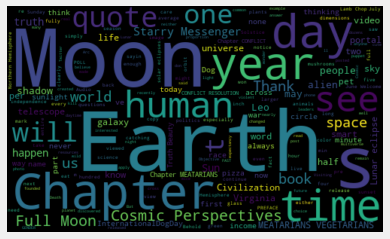

In [14]:
allWords = ' '.join([twts for twts in twitter['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Apply a Sentiment in word and save in datafame

In [15]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [16]:
twitter['Analysis'] = twitter['Polarity'].apply(getAnalysis)

In [17]:
twitter

,Tweets,Subjectivity,Polarity,Analysis
0,Leo from Virginia recommends Starry Messenger ...,0.112500,0.000000,Neutral
1,SQUIRREL !!!,0.000000,0.000000,Neutral
2,Leo from Virginia just read about how space ex...,0.133929,-0.035714,Negative
3,"In the chapter Meatarians & Vegetarians, Leo f...",1.000000,0.000000,Neutral
4,Reading his pre-release copy of Starry Messeng...,1.000000,0.250000,Positive
...,...,...,...,...
95,If it was not otherwise clear: The link to th...,0.383333,0.100000,Positive
96,everybody knows… \n\n1 Guffaw = 10 Chortles,0.000000,0.000000,Neutral
97,We talked about science in bad movies. Was a g...,0.681905,-0.007143,Negative
98,"With a telescope, the Moon is best viewed duri...",0.581250,0.306250,Positive


In [18]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tweets        100 non-null    object 
 1   Subjectivity  100 non-null    float64
 2   Polarity      100 non-null    float64
 3   Analysis      100 non-null    object 
dtypes: float64(2), object(2)
memory usage: 3.2+ KB


### Get positive tweets

In [19]:
positive = twitter.loc[twitter['Analysis'].str.contains('Positive')]
positive = positive.drop(['Subjectivity','Polarity'], axis=1)

In [20]:
positive.head()

,Tweets,Analysis
4,Reading his pre-release copy of Starry Messeng...,Positive
5,"If global warming continues:\n\n“Damn, it’s 'H...",Positive
6,"Objective truths apply to all people, places, ...",Positive
7,Objective truths of science are not founded in...,Positive
8,Visiting aliens will have none of our biases. ...,Positive


In [21]:
positive.shape

(57, 2)

### Get negative Tweets

In [22]:
negative = twitter.loc[twitter['Analysis'].str.contains('Negative')]
negative = negative.drop(['Subjectivity','Polarity'], axis=1)

In [23]:
negative.head()

,Tweets,Analysis
2,Leo from Virginia just read about how space ex...,Negative
14,FAST POLL RESULTS: One in five of you are eith...,Negative
16,Fast Poll...\n\nI posted dozens of quotes this...,Negative
28,In 1945 we defeated violent fascist leaders wh...,Negative
37,"Chapter: CONFLICT & RESOLUTION\n\n""Part the cu...",Negative


In [24]:
negative.shape

(17, 2)

### Get Neutral Tweets

In [25]:
neutral = twitter.loc[twitter['Analysis'].str.contains('Neutral')]
neutral = neutral.drop(['Subjectivity','Polarity'], axis=1)

In [26]:
neutral.head()

,Tweets,Analysis
0,Leo from Virginia recommends Starry Messenger ...,Neutral
1,SQUIRREL !!!,Neutral
3,"In the chapter Meatarians & Vegetarians, Leo f...",Neutral
9,Meat production in the US is staggeringly effi...,Neutral
10,Searching keywords with my handle. In this c...,Neutral


In [27]:
neutral.shape

(26, 2)

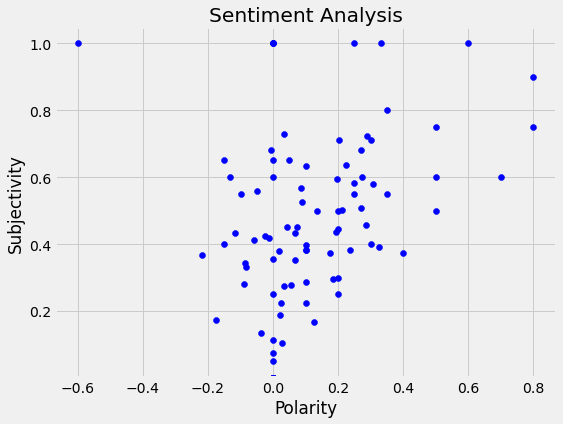

In [28]:
plt.figure(figsize=(8,6))
for i in range(0, twitter.shape[0]):
    plt.scatter(twitter["Polarity"][i], twitter["Subjectivity"][i], color='Blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

### Percentage of positive, negative and neutral tweets

In [29]:
print(str(round((positive.shape[0]/twitter.shape[0])*100, 1))+' %')

57.0 %


In [30]:
print(str(round((negative.shape[0]/twitter.shape[0])*100, 1))+' %')

17.0 %


In [31]:
twitter['Analysis'].value_counts()

Positive    57
Neutral     26
Negative    17
Name: Analysis, dtype: int64

### Plotting and visualizing tweets

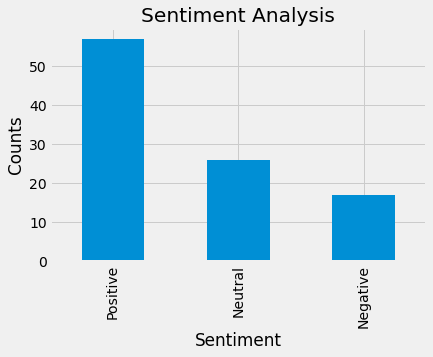

In [32]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
twitter['Analysis'].value_counts().plot(kind = 'bar')
plt.show()


### Using Naive Bayes Algorithm

In [33]:
tweet_sentiment = []
i=0
while(i<10):
    i=i+1;
    print(twitter['Tweets'][i])
    analysis = TextBlob(twitter['Tweets'][i], analyzer=NaiveBayesAnalyzer())
    print(analysis.sentiment)
    tweet_sentiment.append(analysis.sentiment.classification)

SQUIRREL !!! 
Sentiment(classification='pos', p_pos=0.7857142857142855, p_neg=0.21428571428571433)
Leo from Virginia just read about how space exploration, giving access to unlimited resources, could bring an end to all wars on Earth waged over limited resources. Reflecting on this fact gives him hope of the future of humans. InternationalDogDay 
Sentiment(classification='pos', p_pos=0.9265796959975221, p_neg=0.07342030400247869)
In the chapter Meatarians & Vegetarians, Leo from Virginia was intrigued that some humans eat only plants. InternationalDogDay 
Sentiment(classification='neg', p_pos=0.3477289449522334, p_neg=0.6522710550477654)
Reading his pre-release copy of Starry Messenger, Leo from Virginia was especially interested in the paragraph on Dog life-expectancy, in the final chapter titled “Life & Death”. InternationalDogDay 
Sentiment(classification='pos', p_pos=0.7353344686288849, p_neg=0.2646655313711197)
If global warming continues:

“Damn, it’s 'Hot as Earth' down here!”



In [34]:
data = {'Tweet':tweet_sentiment}
data = pd.DataFrame(data)

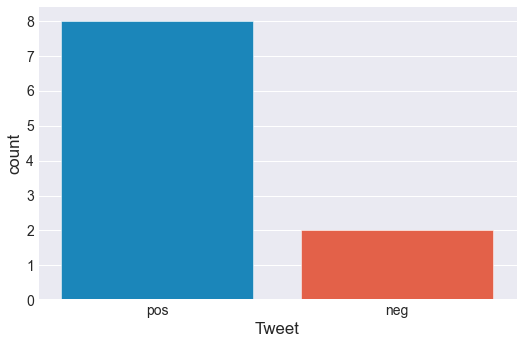

In [35]:
sns.set_style('darkgrid')
g = sns.catplot(x='Tweet', data=data, aspect=1.5, kind="count")